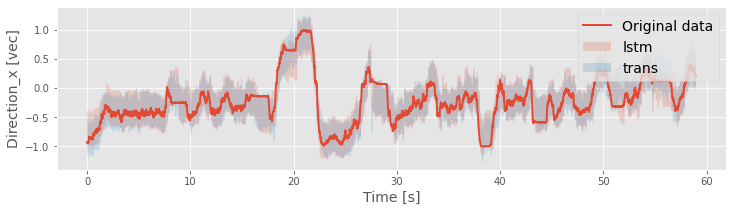

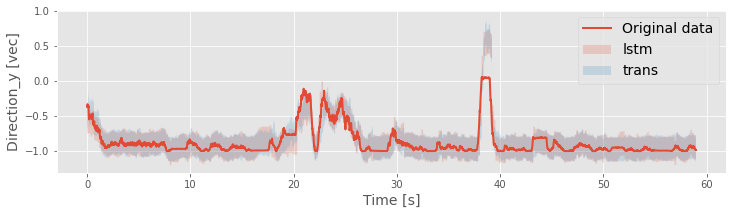

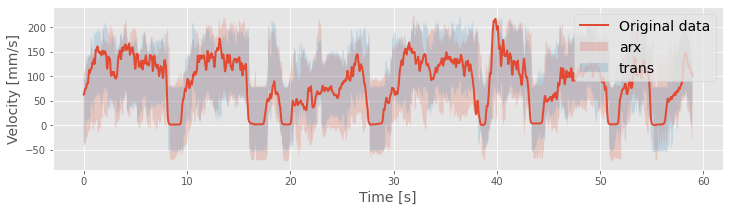

In [2]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

def intervals_bounds(pred, label):
    confidence_level = 0.95
    residuals = label - pred

    # Calculate the prediction intervals using quantiles
    lower_quantile = (1 - confidence_level) / 2
    upper_quantile = 1 - lower_quantile
    lower_bounds = np.quantile(residuals, lower_quantile) + pred
    upper_bounds = np.quantile(residuals, upper_quantile) + pred
    return lower_bounds, upper_bounds

def pred_intervals_direction(fold_path, window_size, time_step, cricket_number, input_pattern):
    names = globals()
    for model_type in ["lstm","hlstm","arx","trans"]:
        # get the directon data from the csv file
        direction_path = fold_path + "/Evaluation/Results/"+ model_type+"_"+str(window_size)+"_"+str(time_step)+"_"+cricket_number+"_Direction_"+input_pattern+".csv"
        direction = pd.read_csv(direction_path, usecols=[1,2,3,4])
        direction = np.array(direction)
        names[model_type+"_pred_direction_x"], names[model_type+"_pred_direction_y"] = direction[:,0], direction[:,1]
        names[model_type+"_label_direction_x"], names[model_type+"_label_direction_y"] = direction[:,2], direction[:,3]
        # pred_direction_x, pred_direction_y = direction[:,0], direction[:,1]
        # label_direction_x, label_direction_y = direction[:,2], direction[:,3]

        end = len(eval("lstm_label_direction_x")) * 1/119.88
        t_test = np.arange(0, end, 1/119.88) 
        names[model_type+"_lower_bounds_x"], names[model_type+"_upper_bounds_x"] = intervals_bounds(eval(model_type+"_pred_direction_x"), eval(model_type+"_label_direction_x"))
        names[model_type+"_lower_bounds_y"], names[model_type+"_upper_bounds_y"] = intervals_bounds(eval(model_type+"_pred_direction_y"), eval(model_type+"_label_direction_y"))

    plt.figure(figsize=(12, 3))
    plt.plot(t_test, eval("lstm_label_direction_x"), label="Original data", linewidth=2)
    for model_type in ["lstm","trans"]:
        plt.fill_between(t_test, eval(model_type+"_lower_bounds_x"), eval(model_type+"_upper_bounds_x"), alpha=0.2, label=model_type)
        plt.ylabel("Direction_x [vec]", fontsize=14)
        plt.xlabel("Time [s]", fontsize=14)
        plt.legend(fontsize=14, loc="upper right",labelcolor="black")

    plt.figure(figsize=(12, 3))
    plt.plot(t_test, eval("lstm_label_direction_y"), label='Original data', linewidth=2)
    for model_type in ["lstm","trans"]:
        plt.fill_between(t_test, eval(model_type+"_lower_bounds_y"), eval(model_type+"_upper_bounds_y"), alpha=0.2, label=model_type)
        plt.ylabel("Direction_y [vec]", fontsize=14)
        plt.xlabel("Time [s]", fontsize=14)
        plt.legend(fontsize=14, loc="upper right",labelcolor="black")

def pred_intervals_vel(fold_path, window_size, time_step, cricket_number, input_pattern):
    names = globals()
    for model_type in ["lstm","hlstm","arx","trans"]:
        # get the vel data from the csv file
        vel_path = fold_path + "/Evaluation/Results/"+ model_type+"_"+str(window_size)+"_"+str(time_step)+"_"+cricket_number+"_Vel_"+input_pattern+".csv"
        vel = pd.read_csv(vel_path, usecols=[1,2,3,4,5,6])
        vel = np.array(vel)
        names[model_type+"_pred_vel"], names[model_type+"_pred_vel_x"], names[model_type+"_pred_vel_y"] = vel[:,0], vel[:,1], vel[:,2]
        names[model_type+"_label_vel"], names[model_type+"_label_vel_x"], names[model_type+"_label_vel_y"] = vel[:,3], vel[:,4], vel[:,5]

        end = len(eval("lstm_label_vel")) * 1/119.88
        t_test = np.arange(0, end, 1/119.88)
        names[model_type+"_lower_bounds_vel"], names[model_type+"_upper_bounds_vel"] = intervals_bounds(eval(model_type+"_pred_vel"), eval(model_type+"_label_vel"))
    
    plt.figure(figsize=(12, 3))
    plt.plot(t_test, eval("lstm_label_vel"), label="Original data", linewidth=2) 
    for model_type in ["arx","trans"]:
        plt.fill_between(t_test, eval(model_type+"_lower_bounds_vel"), eval(model_type+"_upper_bounds_vel"), alpha=0.2, label=model_type)
        plt.ylabel("Velocity [mm/s]", fontsize=14)
        plt.xlabel("Time [s]", fontsize=14)
        plt.legend(fontsize=14, loc="upper right",labelcolor="black")

def vel_results_visualization(model_type,
                                                            window_size,
                                                            time_step,
                                                            cricket_number, 
                                                            input_pattern,
                                                            fold_path):
    results_path = fold_path + "/Evaluation/Results/" + model_type + "_" + str(window_size) + "_" + str(time_step) + "_" + cricket_number + "_Vel_" + input_pattern +  ".csv"
    results = pd.read_csv(results_path, header=0, usecols=[1, 2, 3, 4, 5, 6])
    results = np.array(results)
    
    pred_test = results[:,:3]
    label_test = results[:,3:]

    end = len(label_test) * 1/119.88
    t_test = np.arange(0, end, 1/119.88) 

    plt.figure(figsize=(12, 3))
    plt.plot(t_test,label_test[:,0],label='Original data',c='blue',linewidth=2)
    plt.plot(t_test,pred_test[:,0],label='Prediction',c='red',linestyle='--',linewidth=2)
    plt.xticks(fontsize=14)  
    plt.yticks(fontsize=14)
    plt.xlabel('Time t [s]',fontsize=14)
    plt.ylabel('Vel [mm/s]',fontsize=14)
    plt.title('Vel_'+cricket_number,fontsize=14)
    plt.show()
    #plt.savefig(fold_path + "/Evaluation/Results/" + model_type + "_" + str(window_size) + "_" + str(time_step) + "_" + cricket_number + "_Vel_" + input_pattern +  ".png",bbox_inches = 'tight')
    #plt.legend(fontsize=14)
    
    plt.figure(figsize=(12, 3))
    plt.plot(t_test[-3000:],label_test[-3000:,1],label='Original data',linewidth=2)
    plt.plot(t_test[-3000:],pred_test[-3000:,1],label='Prediction',linestyle='--',linewidth=2)
    plt.xticks(fontsize=14)  
    plt.yticks(fontsize=14)
    plt.xlabel('Time t [s]',fontsize=14)
    plt.ylabel('Vel_x [mm/s]',fontsize=14)
    plt.title('Vel_x_'+cricket_number,fontsize=14)
    plt.show()
    #plt.savefig(fold_path + "/Evaluation/Results/" + model_type + "_" + str(window_size) + "_" + str(time_step) + "_" + cricket_number + "_Vel_x_" + input_pattern +  ".png",bbox_inches = 'tight')
    #plt.legend(fontsize=14)

    plt.figure(figsize=(12, 3))
    plt.plot(t_test[-3000:],label_test[-3000:,2],label='Original data',c='blue',linewidth=2)
    plt.plot(t_test[-3000:],pred_test[-3000:,2],label='Prediction',c='red',linestyle='--',linewidth=2)
    plt.xticks(fontsize=14)  
    plt.yticks(fontsize=14)
    plt.xlabel('Time t [s]',fontsize=14)
    plt.ylabel('Vel_y [mm/s]',fontsize=14)
    plt.title('Vel_y_'+cricket_number,fontsize=14)
    plt.show()
    #plt.savefig(fold_path + "/Evaluation/Results/" + model_type + "_" + str(window_size) + "_" + str(time_step) + "_" + cricket_number + "_Vel_y_" + input_pattern +  ".png",bbox_inches = 'tight')
    #plt.legend(fontsize=14)

fold_path = os.getcwd() 
# model_type = "trans" # ["lstm","hlstm","arx","trans"]
window_size = 100
time_step = 20
cricket_number = "c21"
input_pattern = "pattern1" # ["pattern1(All)","pattern2(ThC+2FTi hind leg)","pattern3(THC)"]

pred_intervals_direction(fold_path, window_size, time_step, cricket_number, input_pattern)
pred_intervals_vel(fold_path, window_size, time_step, cricket_number, input_pattern)

#vel_results_visualization("trans",window_size,time_step,cricket_number,input_pattern,fold_path)


In [ ]:
import numpy as np
from pyts.image import GramianAngularField

plt.figure()
gadf = GramianAngularField(image_size=64)
gadf_image = gadf.fit_transform(eval("lstm_label_vel").reshape(1, -1))
plt.imshow(gadf_image[0], cmap='rainbow', origin='lower')
plt.colorbar()
plt.title('Gramian Angular Difference Field')
plt.show()

plt.figure()
gadf = GramianAngularField(image_size=64)
gadf_image = gadf.fit_transform(eval("lstm_pred_vel").reshape(1, -1))
plt.imshow(gadf_image[0], cmap='rainbow', origin='lower')
plt.colorbar()
plt.title('Gramian Angular Difference Field')
plt.show()

plt.figure()
gadf = GramianAngularField(image_size=64)
gadf_image = gadf.fit_transform(eval("hlstm_pred_vel").reshape(1, -1))
plt.imshow(gadf_image[0], cmap='rainbow', origin='lower')
plt.colorbar()
plt.title('Gramian Angular Difference Field')
plt.show()

plt.figure()
gadf = GramianAngularField(image_size=64)
gadf_image = gadf.fit_transform(eval("arx_pred_vel").reshape(1, -1))
plt.imshow(gadf_image[0], cmap='rainbow', origin='lower')
plt.colorbar()
plt.title('Gramian Angular Difference Field')
plt.show()

plt.figure()
gadf = GramianAngularField(image_size=64)
gadf_image = gadf.fit_transform(eval("trans_pred_vel").reshape(1, -1))
plt.imshow(gadf_image[0], cmap='rainbow', origin='lower')
plt.colorbar()
plt.title('Gramian Angular Difference Field')
plt.show()